In [ ]:
#와인 데이터셋 불러오기
import pandas as pd
red =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [ ]:
#데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2)) #레드와인
print(white.head(2)) #화이트와인

wine = pd.concat([red, white])#와인 데이터셋 합치기
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

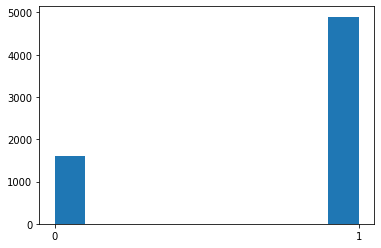

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
#레드와인과 화이트와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [ ]:
#80% 훈련데이터(train_x), 20% 테스트 데이터(test_x) 만들기 
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)

train_x, train_y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_x, test_y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_x[0])
print(train_y[0])
print(test_x[0])
print(test_y[0])

train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)#원핫인코딩을 만들기위해 .to_categorical 지정
print(train_y[0])
print(test_y[0])

NameError: ignored

In [ ]:
#품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [ ]:
# 품질을 3개의 범주 (좋음, 보통, 나쁨)으로 재분류
# 기말고사에 나올 확률 있음
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [ ]:
#내용들을 하나의 코드로 정리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_up[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_y, num_classes=3)

KeyError: ignored

In [ ]:
#와인 데이터셋 다함 분류 모델 생성 및 학습
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),                             
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

NameError: ignored

In [ ]:
#필요 모듈 임포트
#tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras

#문제와 정답 데이터 지정
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_Tabels), (test_images, test_labels) = fashion_mnist.load_data()
#10개의 분류 이름 지정
class_names = ['T-shirt/top', 'Truouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#데이터 전처리
#샘플 값을 정수(0~255)에서 부동소수(0~1)로 전환
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


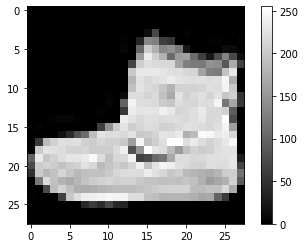

9


In [ ]:
#데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [ ]:
# 10개의 분류 이름 지정
class_names = ['T-shirt/top', 'Truouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[train_Y[0]])


Ankle boot


In [ ]:
#데이터 정규환
train_X = train_X / 255.0
test_X = test_X /255.0

print(train_X[0])
#Fashion MNIST 분류 모델
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile (optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

#Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    